# Extraction de Keywords

## Imports

In [2]:
import os
import yake

## Extraire les mots clés d'un document avec Yake

https://github.com/LIAAD/yake

In [3]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [4]:
# Lister les Fichiers
data_path = "../../data/txt/camille_lesoir_sample/txt"
files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

In [5]:
# Imprimer le nombre de fichiers identifiés
len(files)

7936

In [6]:
# Les fichiers de 1934
files = [f for f in files if '1934' in f]

In [7]:
# Les dix premiers fichiers
files[:10]

['KB_JB838_1934-01-04_01-00011.txt',
 'KB_JB838_1934-01-05_01-00013.txt',
 'KB_JB838_1934-01-09_01-00010.txt',
 'KB_JB838_1934-01-14_01-00011.txt',
 'KB_JB838_1934-01-16_01-00004.txt',
 'KB_JB838_1934-01-17_01-00003.txt',
 'KB_JB838_1934-01-17_01-00014.txt',
 'KB_JB838_1934-01-18_01-00005.txt',
 'KB_JB838_1934-01-21_01-00010.txt',
 'KB_JB838_1934-01-24_01-00005.txt']

In [8]:
# Choisir un fichier
this_file = files[0]
this_file

'KB_JB838_1934-01-04_01-00011.txt'

In [9]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r', encoding='utf-8').read()
text[:500]

"4 JANVIER 1934 LE SO!$ 11. Le bâtonnet de 5 Cubes LIEB1G (avec Bon pour Chromos) ?r. 2.50 Les Cubes de Bouillon LIEBIG Un Cube de Bouillon Liebig contient 2 tablettes. Chaque tablette permet de préparer 1/2 litre d’excellent bouillon à base d'Extrait de Viande Liebig et de la saveur de légumes frais. La présentation en tablettes du Cube Liebig, nouvelle et si pratique, rend ce bouillon concentré très facile à doser et à dissoudre. LE CUBE LIEBIG DANS TOUTE CUISINE SITUATION STABLE est offerte.à "

In [10]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

[('dem', np.float64(0.0012853483779238892)),
 ('Rossel', np.float64(0.0035596805095076587)),
 ('rue', np.float64(0.003988589596839352)),
 ('Agence Rossel', np.float64(0.00512882726300402)),
 ('dem.', np.float64(0.005390949843036508)),
 ('Ecrire Agence Rossel', np.float64(0.006881048754283212)),
 ('Ecr', np.float64(0.009238400751343601)),
 ('serveuse', np.float64(0.009839783607754678)),
 ('DEMANDE', np.float64(0.009883380805646089)),
 ('Bon', np.float64(0.010545105245928128)),
 ('Ecrire', np.float64(0.012676550981669778)),
 ('place', np.float64(0.014930582253871895)),
 ('FEMME dem', np.float64(0.015234717605950911)),
 ('prés', np.float64(0.018129379127548837)),
 ('DEM. serveuse', np.float64(0.01972060674112825)),
 ('faire', np.float64(0.020021304516457998)),
 ('servante', np.float64(0.020124149280024838)),
 ('Maison FEMME dem', np.float64(0.020309492498638546)),
 ('fille', np.float64(0.023911051785751817)),
 ('cherche', np.float64(0.024093065617577885)),
 ('FEMME', np.float64(0.02421914

In [11]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['Agence Rossel',
 'FEMME dem',
 'DEM. serveuse',
 'Cube Liebig',
 'CHARCUTERIE dem',
 'dem. place',
 'demande place',
 'DEMANDE servante',
 'FEM. dem.',
 'demande serveuse',
 'rue Van',
 'Bouillon LIEBIG',
 'DEM. fem',
 'Ecrire Agence',
 'cherche place',
 'MANUCURE dem']

## Faire la même opération sur tous les documents

In [12]:
for f in sorted(files)[:10]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1934-01-04_01-00011.txt mentions these keywords: Agence Rossel, FEMME dem, DEM. serveuse, Cube Liebig, CHARCUTERIE dem, dem. place, demande place, DEMANDE servante, FEM. dem., demande serveuse, rue Van, Bouillon LIEBIG, DEM. fem, Ecrire Agence, cherche place, MANUCURE dem...
KB_JB838_1934-01-05_01-00013.txt mentions these keywords: AGENCE ROSSEL, Ecrire AGENCE, noyer poli, FINE LINGERIE, bas prix, MANUCURE rue, noyer poil, Prix modérés, rue Scailquin...
KB_JB838_1934-01-09_01-00010.txt mentions these keywords: bel app, REMEDES RHUMES, Agence ROSSEL, app. mod, VIEUX REMEDES, rue Van, Pte Louise, confort moderne...
KB_JB838_1934-01-14_01-00011.txt mentions these keywords: BELLE MAISON, Ledit notaire, BONNE MAISON, vendra publiquement, notaire vendra, BATIR rue, notaire Camille, MAISON D’HABITATION, notaire Georges, VENTE PUBLIQUE, notaires CLAES...
KB_JB838_1934-01-16_01-00004.txt mentions these keywords: Mme STAVISKY, Janvier Mars, Novembre Janvier, Mars Mai, Mai Juillet, Josep

# Nuages de mots

## Imports et stopwords

In [13]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [15]:
# Choisir une année
year = 1934

In [16]:
# Lister les fichiers de cette année
data_path = '../../data'
txt_path = '../../data/txt/camille_lesoir_sample/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [17]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [18]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [39]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'4 JANVIER 1934 LE SO!$ 11. Le bâtonnet de 5 Cubes LIEB1G (avec Bon pour Chromos) ?r. 2.50 Les Cubes de Bouillon LIEBIG Un Cube de Bouillon Liebig contient 2 tablettes. Chaque tablette permet de prépar'

In [40]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [21]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"4 JANVIER 1934 LE SO!$ 11. Le bâtonnet de 5 Cubes LIEB1G (avec Bon pour Chromos) ?r. 2.50 Les Cubes de Bouillon LIEBIG Un Cube de Bouillon Liebig contient 2 tablettes. Chaque tablette permet de préparer 1/2 litre d’excellent bouillon à base d'Extrait de Viande Liebig et de la saveur de légumes frais. La présentation en tablettes du Cube Liebig, nouvelle et si pratique, rend ce bouillon concentré très facile à doser et à dissoudre. LE CUBE LIEBIG DANS TOUTE CUISINE SITUATION STABLE est offerte.à "

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [22]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [23]:
clean_text(year, folder=temp_path)

'Output has been written in ../../data/tmp/1934_clean.txt!'

In [24]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'JANVIER BÂTONNET CUBES BON CHROMOS CUBES BOUILLON LIEBIG CUBE BOUILLON LIEBIG CONTIENT TABLETTES CHAQUE TABLETTE PERMET PRÉPARER LITRE EXCELLENT BOUILLON BASE EXTRAIT VIANDE LIEBIG SAVEUR LÉGUMES FRAIS PRÉSENTATION TABLETTES CUBE LIEBIG NOUVELLE PRATIQUE REND BOUILLON CONCENTRÉ TRÈS FACILE DOSER DISSOUDRE CUBE LIEBIG TOUTE CUISINE SITUATION STABLE OFFERTE ÉLÊM TRAV INTELL FMP FIRME DÉS CRÉER RÉG LOCAL PROPAG PUBLICITÉ ECR BOÎTE POST ÇLS BRUX CENTRE MAISON GROS CHERCHE JEUNE FILLE COURSES ENTRETI'

## Nuage de mots

### Afficher les termes les plus fréquents


In [25]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('RUE', 3092), ('BRUXELLES', 1530), ('PRIX', 1279), ('MAISON', 889), ('PLACE', 844), ('ECR', 822), ('ANS', 804), ('TRÈS', 800), ('ECRIRE', 753), ('HEURES', 721)]


### Créer, stocker et afficher le nuage de mots

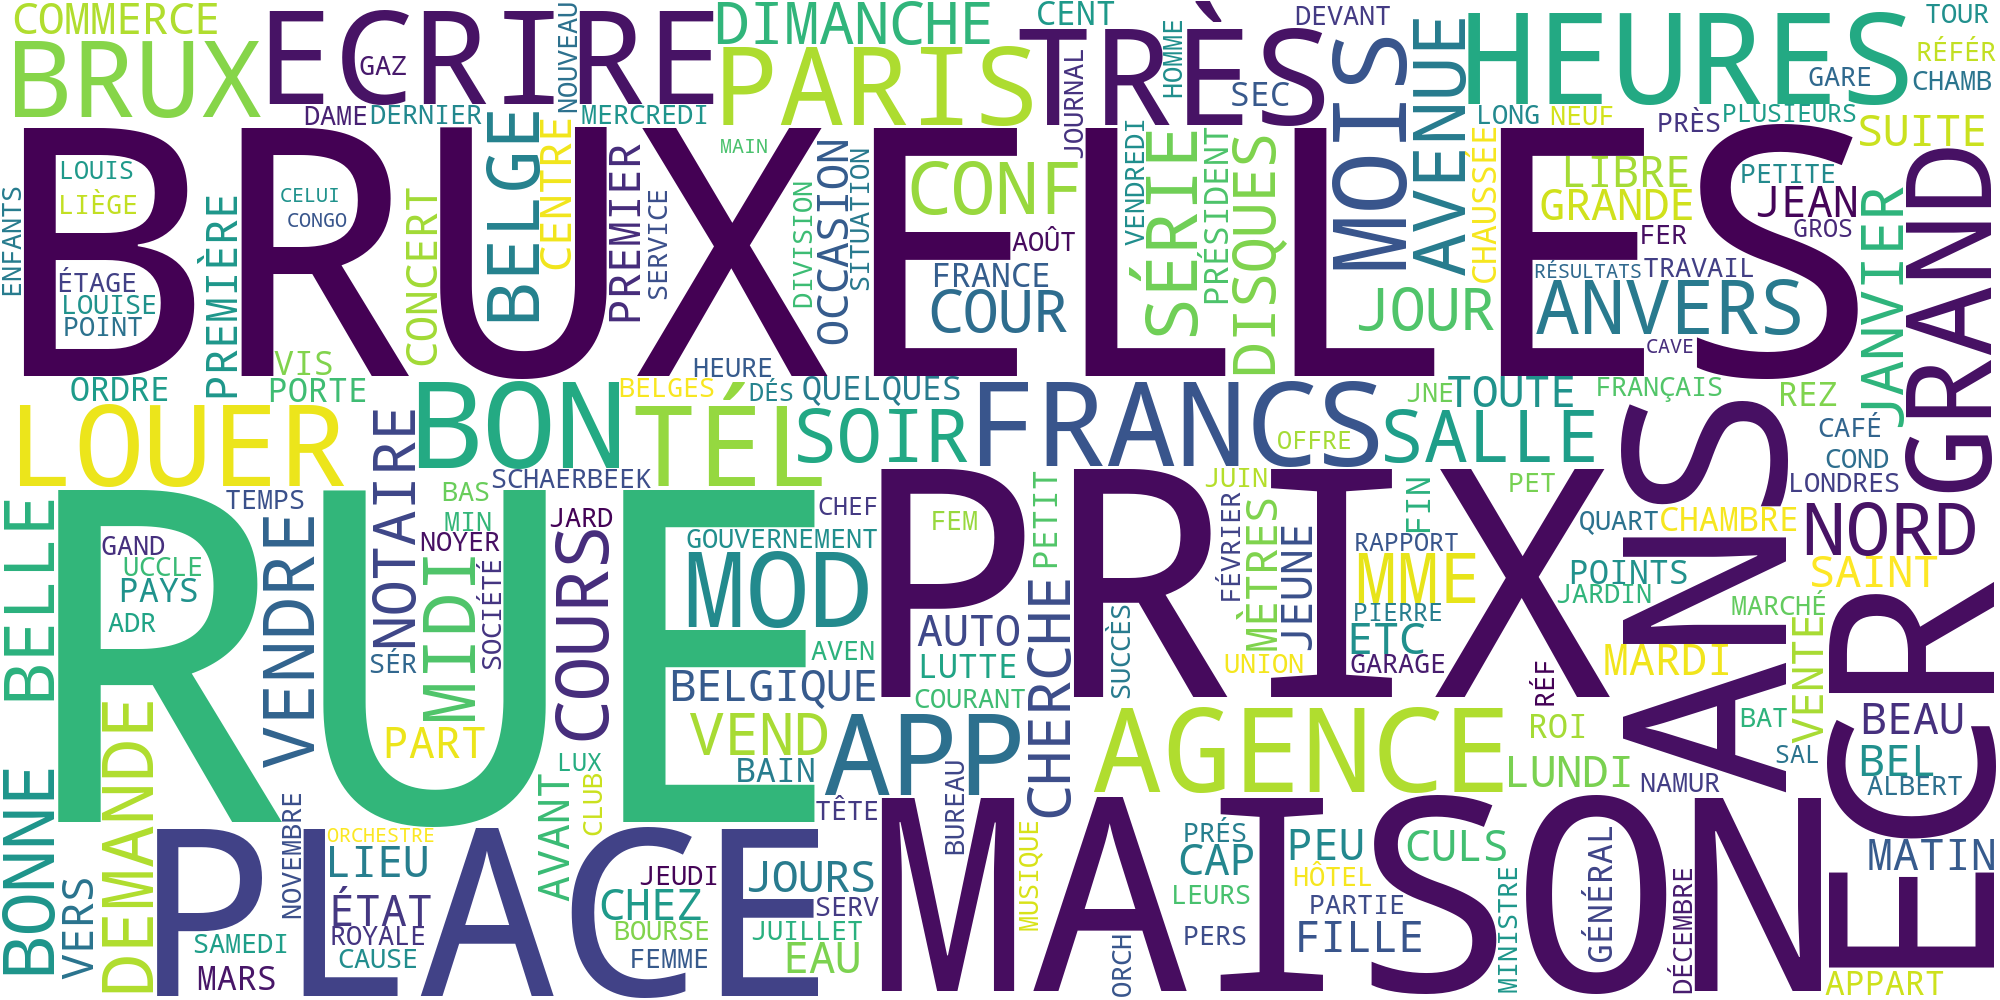

In [26]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# Reconnaissance d'entités nommées avec SpaCy

La documentation est accessible ici: https://spacy.io/api

## Imports

In [29]:
from collections import defaultdict
import spacy
from spacy.lang.fr.examples import sentences
import  fr_core_news_md

In [30]:
nlp = spacy.load('fr_core_news_md')